This is a simple example on how you can use a jupyter notebook to train your model :) 

In [1]:
import torch
import torch.nn as nn
from dataloaders import load_cifar10
from task2 import Trainer, compute_loss_and_accuracy, create_plots,weights_init

In [2]:
class ExampleModel(nn.Module):

    def __init__(self,
                 image_channels, 
                 num_classes):
        #image_channels=3
        #num_classes=10
        
        """
            Is called when model is initialized.
            Args:
                image_channels. Number of color channels in image (3)
                num_classes: Number of classes we want to predict (10)
        """
        super().__init__()
        num_filters = 32  # Set number of filters in first conv layer
        self.num_classes = num_classes
        # Define the convolutional layers
        self.feature_extractor = nn.Sequential(
            nn.Conv2d(
                in_channels=image_channels,
                out_channels=num_filters,
                kernel_size=5,
                stride=1,
                padding=2
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(
                in_channels= 32,
                out_channels=64,
                kernel_size=5,
                stride=1,
                padding=2
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(
                in_channels=64,
                out_channels=128,
                kernel_size=5,
                stride=1,
                padding=2
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

        )
        
        # The output of feature_extractor will be [batch_size, num_filters, 16, 16]
        self.num_output_features = 128*4*4#32*32*32
        # Initialize our last fully connected layer
        # Inputs all extracted features from the convolutional layers
        # Outputs num_classes predictions, 1 for each class.
        # There is no need for softmax activation function, as this is
        # included with nn.CrossEntropyLoss
        self.classifier = nn.Sequential(
            nn.Linear(in_features=self.num_output_features,out_features=64),
            nn.ReLU(),
            nn.Linear(in_features=64, out_features=num_classes),
        )
        


    def forward(self, x):
        """
        Performs a forward pass through the model
        Args:
            x: Input image, shape: [batch_size, 3, 32, 32]
        """
        conv_out=self.feature_extractor(x)
        res=conv_out.view(conv_out.size(0), -1)
        out=self.classifier(res)
        expected_shape = (batch_size, self.num_classes)
        assert out.shape == (batch_size, self.num_classes),\
            f"Expected output of forward pass to be: {expected_shape}, but got: {out.shape}"
        return out



In [3]:
epochs = 10
batch_size = 64
learning_rate = 5e-2
early_stop_count = 4
dataloaders = load_cifar10(batch_size)
model = ExampleModel(image_channels=3, num_classes=10)
model.apply(weights_init)
trainer = Trainer(
    batch_size,
    learning_rate,
    early_stop_count,
    epochs,
    model,
    dataloaders
)
trainer.train()

Files already downloaded and verified
Files already downloaded and verified


/home/xyzhu/TDT4265_Homework_by_Xiaoyu/assignment3/task2.py:54: UserWarning: nn.init.xavier_normal is now deprecated in favor of nn.init.xavier_normal_.
  init.xavier_normal(m.weight.data)


ExampleModel(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=2048, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=10, bias=True)
  )
)
Epoch:  0	Batches per seconds: 131.06	Global step:    351	Validation Loss: 1.39,	Validation Accuracy: 0.479
Epoch:  0	Batches per seconds: 126.13	Global step:    702	Validation Loss: 1.38,	Validation Accuracy: 0.541
Epoch:  1	Batches per seconds: 123

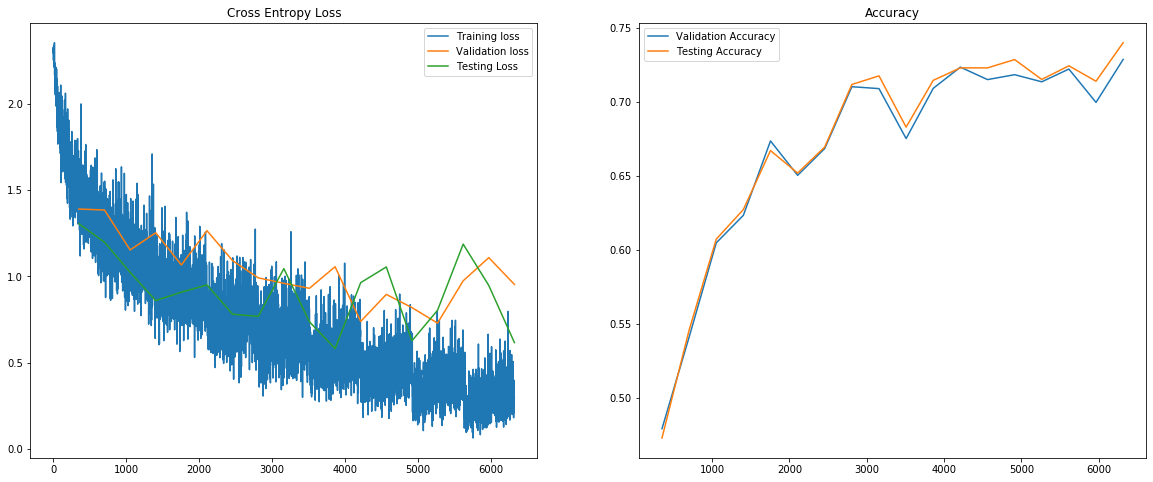

In [4]:
create_plots(trainer, "task2")

In [5]:
#Output the ACC and Loss
    dataloader_train, dataloader_val, dataloader_test = dataloaders
    loss_train_f,acc_train_f=compute_loss_and_accuracy(
            dataloader_train, model, torch.nn.CrossEntropyLoss())
    print('Final Loss on Training Dataset=',loss_train_f)
    print('Final Acc on Training Dataset=',acc_train_f)
    loss_val_f,acc_val_f=compute_loss_and_accuracy(
            dataloader_val, model, torch.nn.CrossEntropyLoss())
    print('Final Loss on Validation Dataset=',loss_val_f)
    print('Final Acc on Validation Dataset=',acc_val_f)
    loss_test_f,acc_test_f=compute_loss_and_accuracy(
            dataloader_test, model, torch.nn.CrossEntropyLoss())
    print('Final Loss on Test Dataset=',loss_test_f)
    print('Final Acc on Test Dataset=',acc_test_f)

Final Loss on Training Dataset= tensor(0.1573, device='cuda:0')
Final Acc on Training Dataset= 0.9402115931721194
Final Loss on Validation Dataset= tensor(0.9534, device='cuda:0')
Final Acc on Validation Dataset= 0.7286658653846154
Final Loss on Test Dataset= tensor(1.0357, device='cuda:0')
Final Acc on Test Dataset= 0.7399839743589743
